# **QSAR Model Building of Acetyl-CoA Carboxylase Activity**

# Read in data

In [1]:
import pandas as pd

In [2]:
file_path = 'C:/Users/jonch/Downloads/ACC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(file_path)
print(dataset)


     PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5   
0             1           1           1           0           0           0  \
1             1           1           1           0           0           0   
2             1           1           1           0           0           0   
3             1           1           1           0           0           0   
4             1           1           1           0           0           0   
..          ...         ...         ...         ...         ...         ...   
150           1           1           1           0           0           0   
151           1           1           1           0           0           0   
152           1           1           1           0           0           0   
153           1           1           1           0           0           0   
154           1           1           1           0           0           0   

     PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9

In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      4.397940
1      4.000000
2      4.397940
3      4.397940
4      4.397940
         ...   
150    6.292430
151    6.000000
152    5.000000
153    6.769551
154    8.123205
Name: pIC50, Length: 155, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP16,PubchemFP20,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP180,...,PubchemFP770,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP803,PubchemFP819,PubchemFP821,PubchemFP833
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,1,0,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,1,0
151,0,1,0,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,1,0
152,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

# Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8750853137894953

## Model Prediction

In [9]:
Y_pred = model.predict(X)
Y_pred

array([4.39814364, 4.20399396, 4.39980127, 4.40031073, 4.39920902,
       4.412902  , 6.44359831, 6.44359831, 6.90400724, 6.44359831,
       6.44359831, 6.4951681 , 6.21672248, 5.70073015, 5.95276726,
       5.75578225, 6.76103367, 6.10571808, 6.2246494 , 6.13045979,
       5.95912932, 5.97259273, 5.78139715, 5.78139715, 5.70301548,
       7.00484882, 7.22291051, 6.9447578 , 7.19607677, 6.67150101,
       7.00484882, 6.9447578 , 7.15445538, 7.12513596, 6.60845324,
       6.91941745, 6.51425442, 5.99891787, 7.29003596, 7.20698681,
       7.45379222, 7.46656119, 7.51934111, 7.34352249, 7.1801849 ,
       7.56397471, 6.66906854, 7.97682553, 7.94270863, 7.75652983,
       7.61803666, 7.73104797, 7.70247571, 7.7322133 , 7.84771376,
       6.41466029, 7.36371805, 6.78824046, 6.72071572, 6.64339796,
       6.52452964, 6.30623252, 6.03308963, 7.33209354, 7.53334214,
       7.51221772, 7.18546743, 7.33551819, 7.73953028, 5.61138983,
       5.68744309, 4.66838469, 4.88265299, 5.34453951, 5.68744

## Model Performance

In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.16
Coefficient of determination (R^2): 0.88


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

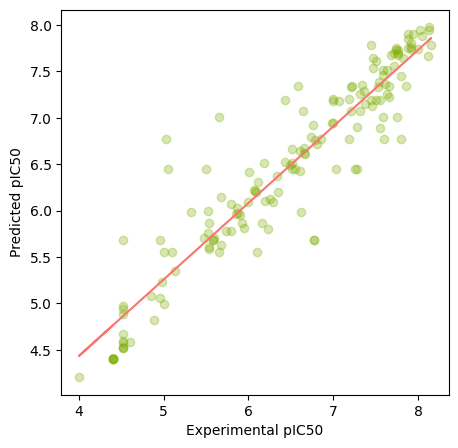

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [13]:
import pickle

In [14]:
pickle.dump(model, open('ACC_model.pkl', 'wb'))